# Making neural network interpretable with attribution
## Case-study: toy problems
_Darius AFCHAR_

We provide an implementation notebook of the toy problems introduced in the paper.

#### Tested with
- tensorflow: 2.2.0
- numpy: 1.18.0

In [27]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.2.0


In [15]:
'''
Define several toy datasets
'''

def datagen_A(bs = 256, dist = 1.0, noise_level = 0.25):
    ''' 4 clusters separables '''
    X = np.random.normal(0, noise_level, (bs, 2))
    Y = np.ones((bs, 1))
    s = bs // 4
    X[:s] = X[:s] + [-dist, 0]
    Y[:s] = 0.
    X[s:(2*s)] = X[s:(2*s)] + [dist, 0]
    Y[s:(2*s)] = 1.
    X[(2*s):(3*s)] = X[(2*s):(3*s)] + [0, dist]
    Y[(2*s):(3*s)] = 1.
    X[(3*s):] = X[(3*s):] + [0, -dist]
    Y[(3*s):] = 0.
    return X, Y

def datagen_B(bs = 256, dist = 1.0, noise_level = 0.25):
    ''' 4 clusters XOR '''
    X = np.random.normal(0, noise_level, (bs, 2))
    Y = np.ones((bs, 1))
    s = bs // 4
    X[:s] = X[:s] + [-dist, -dist]
    Y[:s] = 0.
    X[s:(2*s)] = X[s:(2*s)] + [dist, -dist]
    Y[s:(2*s)] = 1.
    X[(2*s):(3*s)] = X[(2*s):(3*s)] + [-dist, dist]
    Y[(2*s):(3*s)] = 1.
    X[(3*s):] = X[(3*s):] + [dist, dist]
    Y[(3*s):] = 0.
    return X, Y

def datagen_C(bs = 256, noise_level = 0.25):
    ''' Mixed problem on two input dimensions '''
    Xa, Ya = datagen_A(bs // 2, 1, noise_level)
    Xb, Yb = datagen_B(bs // 2, 2, noise_level)
    return np.concatenate([Xa, Xb], axis=0), np.concatenate([Ya, Yb], axis=0)

def datagen_D(bs = 256, dist = 1.0, noise_level = 0.25):
    ''' Mixed problem on four input dimensions '''
    X = np.zeros((bs, 4))
    Xa, Ya = datagen_A(bs // 2, dist, noise_level)
    Xb, Yb = datagen_B(bs // 2, dist, noise_level)
    X[:bs//2,:2] = Xa
    X[bs//2:,2:] = Xb
    return X, np.concatenate([Ya, Yb], axis=0)

def make_generator(func, params):
    while True:
        yield func(**params)

Text(0.5, 1.0, 'Dataset D <dim2, dim3> ')

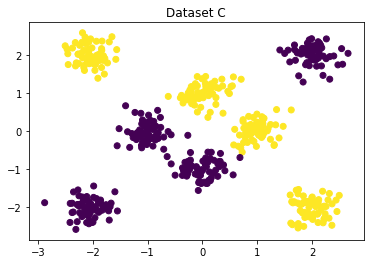

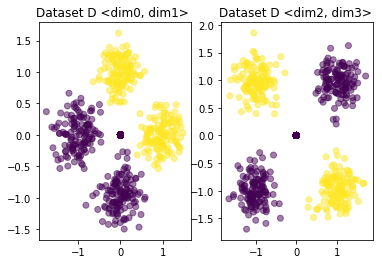

In [28]:
'''
(Optional) Plot and check that everything is ok.
'''
import matplotlib.pyplot as plt
%matplotlib inline

x, y = datagen_C(512)
plt.scatter(x[:,0], x[:,1], c = y[:,0])
plt.title('Dataset C')

plt.figure()
x, y = datagen_D(1024)
plt.subplot(1,2,1)
plt.scatter(x[:,0], x[:,1], c = y[:,0], alpha=0.5)
plt.title('Dataset D <dim0, dim1> ')
plt.subplot(1,2,2)
plt.scatter(x[:,2], x[:,3], c = y[:,0], alpha=0.5)
plt.title('Dataset D <dim2, dim3> ')
